# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Output File (CSV)
output_data_file = "output_data/cities.csv"



In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country=citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
#Combine the 2 lists
#city_country=zip(cities,countries)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#config information
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"



#lists to hold response info
city_id =[]
city_name=[]
country=[]
latitude =[]
longitude =[]
weather_date =[]
temp =[]
humidity =[]
cloudiness =[]
wind_speed =[]
x=0

# write results of API calls into text and csv
weatherlog=open('weatherAPI_printlog.txt', 'w')
apidata=open('weatherAPI_data.csv', 'w')
#header line for csv file
apidata.write("city_id, city_name, country, latitude, longitude, weather_date, temp, humidity, cloudiness, wind_speed\n")


#Loop through list of cities and country codes
query_url= f"{url}appid={weather_api_key}&units={units}&q="
for city in cities:
    x=x+1
    response= requests.get(query_url+city).json()
    try:
        CityID=int(response['id'])
        CityName=city
        CountryCode=response['sys']['country']
        Lat_Val=response['coord']['lat']
        Lon_Val=response['coord']['lon']
        WeatherDate=response['dt']
        Temperature=response['main']['temp']
        Humidity_Val=response['main']['humidity']
        Cloudiness_Val=response['clouds']['all']
        WindSpeed = response['wind']['speed']
         
        # Append retreived values to lists above using the variables created above
        city_id.append(CityID)
        city_name.append(CityName)
        country.append(CountryCode)
        latitude.append(Lat_Val)
        longitude.append(Lon_Val)
        weather_date.append(WeatherDate)
        temp.append(Temperature)
        humidity.append(Humidity_Val)
        cloudiness.append(Cloudiness_Val)
        wind_speed.append(WindSpeed)
           
              
        print(f"{x}{CityName} with city ID:{CityID} was found in the Weathermap API\n")
        weatherlog.write(f"{CityName} with city ID:{CityID} was found in the Weathermap API\n")
        apidata.write(f"{CityID},{CityName},{Lat_Val},{Lon_Val},{WeatherDate},\
        {Temperature},{Humidy_Val},{Cloudiness_Val},{WindSpeed}\n")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        #weatherlog.write(f"{city} was not found in the Weathermap API\n")
        print(f"{x}{city} was not found in the Weathermap API\n")
       
    
# Close the file handle after completion of the loop
weatherlog.close()
apidata.close()

1tuktoyaktuk with city ID:6170031 was found in the Weathermap API

1tuktoyaktuk was not found in the Weathermap API

2fecamp with city ID:3018794 was found in the Weathermap API

2fecamp was not found in the Weathermap API

3pastavy with city ID:623760 was found in the Weathermap API

3pastavy was not found in the Weathermap API

4taolanaro was not found in the Weathermap API

5rikitea with city ID:4030556 was found in the Weathermap API

5rikitea was not found in the Weathermap API

6dikson with city ID:1507390 was found in the Weathermap API

6dikson was not found in the Weathermap API

7te anau with city ID:2181625 was found in the Weathermap API

7te anau was not found in the Weathermap API

8lompoc with city ID:5367788 was found in the Weathermap API

8lompoc was not found in the Weathermap API

9bethel with city ID:5282297 was found in the Weathermap API

9bethel was not found in the Weathermap API

10porto torres with city ID:3170069 was found in the Weathermap API

10porto torr

75rumoi with city ID:2128382 was found in the Weathermap API

75rumoi was not found in the Weathermap API

76codrington with city ID:2171099 was found in the Weathermap API

76codrington was not found in the Weathermap API

77lebu with city ID:3883457 was found in the Weathermap API

77lebu was not found in the Weathermap API

78saldanha with city ID:3361934 was found in the Weathermap API

78saldanha was not found in the Weathermap API

79springdale with city ID:4132093 was found in the Weathermap API

79springdale was not found in the Weathermap API

80saint-philippe with city ID:935215 was found in the Weathermap API

80saint-philippe was not found in the Weathermap API

81samalaeulu was not found in the Weathermap API

82katherine with city ID:2068655 was found in the Weathermap API

82katherine was not found in the Weathermap API

83rio grande with city ID:3451138 was found in the Weathermap API

83rio grande was not found in the Weathermap API

84extremoz with city ID:3400567 was

148nipawin with city ID:6088469 was found in the Weathermap API

148nipawin was not found in the Weathermap API

149hambantota with city ID:1244926 was found in the Weathermap API

149hambantota was not found in the Weathermap API

150kuito with city ID:3348078 was found in the Weathermap API

150kuito was not found in the Weathermap API

151port lincoln with city ID:2063036 was found in the Weathermap API

151port lincoln was not found in the Weathermap API

152halifax with city ID:6324729 was found in the Weathermap API

152halifax was not found in the Weathermap API

153lagoa with city ID:3372964 was found in the Weathermap API

153lagoa was not found in the Weathermap API

154baringo with city ID:200575 was found in the Weathermap API

154baringo was not found in the Weathermap API

155san miguel with city ID:3583446 was found in the Weathermap API

155san miguel was not found in the Weathermap API

156soltsy with city ID:490750 was found in the Weathermap API

156soltsy was not fo

226dalby with city ID:2169535 was found in the Weathermap API

226dalby was not found in the Weathermap API

227petauke with city ID:899825 was found in the Weathermap API

227petauke was not found in the Weathermap API

228cidreira with city ID:3466165 was found in the Weathermap API

228cidreira was not found in the Weathermap API

229yonibana with city ID:2402715 was found in the Weathermap API

229yonibana was not found in the Weathermap API

230yerkoy with city ID:296895 was found in the Weathermap API

230yerkoy was not found in the Weathermap API

231dhilwan with city ID:1272771 was found in the Weathermap API

231dhilwan was not found in the Weathermap API

232sao joao da barra with city ID:3448903 was found in the Weathermap API

232sao joao da barra was not found in the Weathermap API

233saint-paul with city ID:935221 was found in the Weathermap API

233saint-paul was not found in the Weathermap API

234liancheng with city ID:1804119 was found in the Weathermap API

234lianc

305bolu with city ID:750510 was found in the Weathermap API

305bolu was not found in the Weathermap API

306cabo san lucas with city ID:3985710 was found in the Weathermap API

306cabo san lucas was not found in the Weathermap API

307igrim with city ID:1505965 was found in the Weathermap API

307igrim was not found in the Weathermap API

308lac du bonnet with city ID:6014443 was found in the Weathermap API

308lac du bonnet was not found in the Weathermap API

309estelle with city ID:4323873 was found in the Weathermap API

309estelle was not found in the Weathermap API

310isiro with city ID:215771 was found in the Weathermap API

310isiro was not found in the Weathermap API

311oranjemund with city ID:3354071 was found in the Weathermap API

311oranjemund was not found in the Weathermap API

312coxim with city ID:3465228 was found in the Weathermap API

312coxim was not found in the Weathermap API

313antalaha with city ID:1071296 was found in the Weathermap API

313antalaha was no

381isangel with city ID:2136825 was found in the Weathermap API

381isangel was not found in the Weathermap API

382acari with city ID:3948613 was found in the Weathermap API

382acari was not found in the Weathermap API

383chapada dos guimaraes with city ID:3466307 was found in the Weathermap API

383chapada dos guimaraes was not found in the Weathermap API

384northam with city ID:2641434 was found in the Weathermap API

384northam was not found in the Weathermap API

385namibe with city ID:3347019 was found in the Weathermap API

385namibe was not found in the Weathermap API

386gyongyospata with city ID:3052026 was found in the Weathermap API

386gyongyospata was not found in the Weathermap API

387hondo with city ID:1862230 was found in the Weathermap API

387hondo was not found in the Weathermap API

388cooma with city ID:2170577 was found in the Weathermap API

388cooma was not found in the Weathermap API

389sulangan with city ID:1685422 was found in the Weathermap API

389sul

460lashio with city ID:1314759 was found in the Weathermap API

460lashio was not found in the Weathermap API

461constitucion with city ID:3893726 was found in the Weathermap API

461constitucion was not found in the Weathermap API

462mocambique was not found in the Weathermap API

463newport with city ID:2641598 was found in the Weathermap API

463newport was not found in the Weathermap API

464aykhal with city ID:2027296 was found in the Weathermap API

464aykhal was not found in the Weathermap API

465takoradi with city ID:2294915 was found in the Weathermap API

465takoradi was not found in the Weathermap API

466bathsheba with city ID:3374083 was found in the Weathermap API

466bathsheba was not found in the Weathermap API

467cedar city with city ID:5536630 was found in the Weathermap API

467cedar city was not found in the Weathermap API

468pontal do parana with city ID:6322927 was found in the Weathermap API

468pontal do parana was not found in the Weathermap API

469minsk 

535okandja was not found in the Weathermap API

536ouahigouya with city ID:2357043 was found in the Weathermap API

536ouahigouya was not found in the Weathermap API

537nizip with city ID:303798 was found in the Weathermap API

537nizip was not found in the Weathermap API

538pindi gheb with city ID:1168015 was found in the Weathermap API

538pindi gheb was not found in the Weathermap API

539ivanteyevka with city ID:555111 was found in the Weathermap API

539ivanteyevka was not found in the Weathermap API

540roros with city ID:3141332 was found in the Weathermap API

540roros was not found in the Weathermap API

541bontang with city ID:1648186 was found in the Weathermap API

541bontang was not found in the Weathermap API

542damavand with city ID:138042 was found in the Weathermap API

542damavand was not found in the Weathermap API

543nanpiao with city ID:2035644 was found in the Weathermap API

543nanpiao was not found in the Weathermap API

544luanda with city ID:2240449 was fo

612turukhansk with city ID:1488903 was found in the Weathermap API

612turukhansk was not found in the Weathermap API

613anadyr with city ID:2127202 was found in the Weathermap API

613anadyr was not found in the Weathermap API

614matay with city ID:352628 was found in the Weathermap API

614matay was not found in the Weathermap API

615bonthe with city ID:2409914 was found in the Weathermap API

615bonthe was not found in the Weathermap API

616cetraro with city ID:2525012 was found in the Weathermap API

616cetraro was not found in the Weathermap API

617del rio with city ID:5520076 was found in the Weathermap API

617del rio was not found in the Weathermap API

618peraiyur with city ID:1259898 was found in the Weathermap API

618peraiyur was not found in the Weathermap API

619requena with city ID:2511930 was found in the Weathermap API

619requena was not found in the Weathermap API

620chilca with city ID:3943957 was found in the Weathermap API

620chilca was not found in the We

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": country,
    "latitude": latitude,
    "longitude": longitude,
    "weather_date": weather_date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,6170031,tuktoyaktuk,CA,69.45,-133.04,1590173685,37.40,74,5,6.93
1,3018794,fecamp,FR,49.76,0.37,1590173685,57.25,82,90,9.17
2,623760,pastavy,BY,55.12,26.83,1590173686,42.60,70,0,8.14
3,4030556,rikitea,PF,-23.12,-134.97,1590173686,71.11,69,94,19.57
4,1507390,dikson,RU,73.51,80.55,1590173531,40.15,100,100,9.66


In [7]:
#  Get the indices of cities that have humidity over 100%
max_humidity=weather_data['humidity'].max()
print(max_humidity)

100


In [25]:
# Extract relevant fields from the data frame
weather_data_val=weather_data.dropna()
weather_data_val=weather_data_val.reset_index(drop=True)
# Export the City_Data into a csv
weather_data_val.to_csv('../output_data/weather_data_KR.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

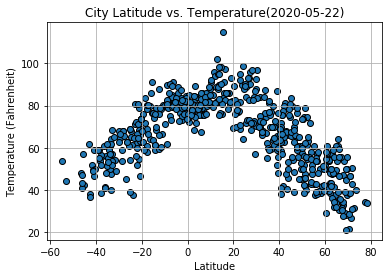

In [26]:
# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
weatherDate = weather_data_val['weather_date'][0]
plt.scatter(weather_data_val["latitude"], weather_data_val["temp"], marker="o",edgecolors='black')
#(f'City Latitude vs Max Temperature ({datetime.now().date()})'
#{weatherDate}")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature({datetime.now().date()})")                                        
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsTemperature.png")

# Show plot
plt.show()

The Latitude vs.Temperature plot shows a correlation between city latitude (closeness to the equator) and temperature; the closer the city to the equator, the warmer the temperature and the further away from the equator, the lower the temperature.


## Latitude vs. Humidity Plot

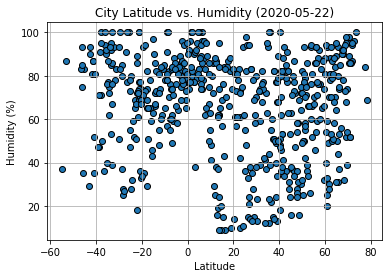

In [27]:
plt.scatter(weather_data_val["latitude"], weather_data_val["humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsHumidity.png")

# Show plot
plt.show()


The Latitude vs. Humidity plot does not seem to have a strong correlation to latitude. One can say however, that it appears more cities have a humidity above 60% than a humidity below 60%.

## Latitude vs. Cloudiness Plot

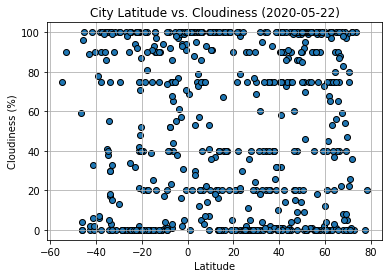

In [28]:
plt.scatter(weather_data_val["latitude"], weather_data_val["cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsCloudiness.png")

# Show plot
plt.show()

The Latitude vs. Cloudiness plot does not seem to have any correlation to latitude. One can say however, that there seems to be a collection of points across all latitudes at either 0%, 75% or 100% Cloudy.

## Latitude vs. Wind Speed Plot

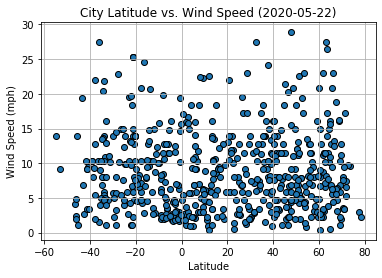

In [29]:
plt.scatter(weather_data_val["latitude"], weather_data_val["wind_speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})") 
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsWindSpeed.png")

# Show plot
plt.show()


The Latitude vs. Wind Speed scatterplot suggests there is no correlation between Wind Speed and Latitude. One can say that regardless of latitude we see the vast majority of wind speed between 0-20 mph, with most of those falling into the 0-10 mph range.

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {datetime.now().date()})") 
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'../output_data/{filename}')
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames
crit_north = weather_data_val.latitude >= 0
crit_south = weather_data_val.latitude < 0

north_weather = weather_data_val[crit_north]
south_weather = weather_data_val[crit_south]

north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8159107381835309
y = -0.71x + 92.62


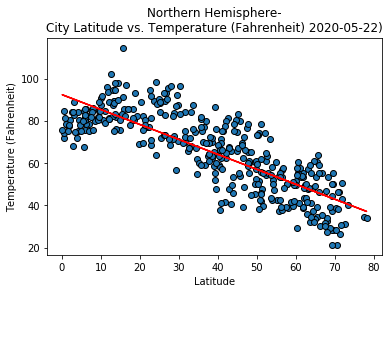

In [34]:
make_lin_reg_plot(north_weather["latitude"],north_weather["temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png',6,-20)

This scatterplot with linear regression has an r-squared value of -0.82, so there is a strong negative linear relationship between increasing latitude and decreasing temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8155072820717283
y = 0.82x + 84.21


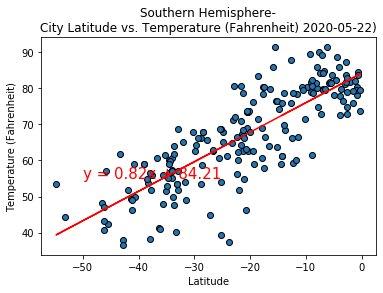

In [35]:
make_lin_reg_plot(south_weather["latitude"],south_weather["temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-50,55)

This scatter plot shows a stronger relationship between temperature and latitude in the Southern Hemisphere, with an r-squared value of 0.83. There is a positive relationship between increased latitude and increased temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.010219060474431598
y = -0.01x + 64.6


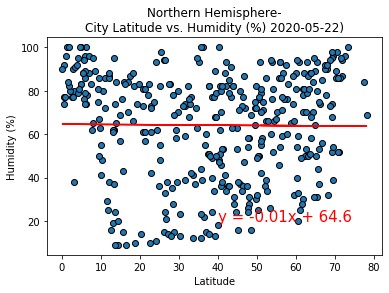

In [36]:
make_lin_reg_plot(north_weather["latitude"],north_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',40,20)

This scatter plot shows a very weak relationship between latitude and humidity in the Northern Hemisphere with an r-squared value of 0.05. So, although there is some correlation it is very weak and I would conclude there is little correlation between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07179461865037622
y = 0.1x + 74.37


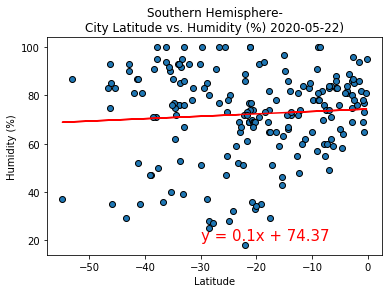

In [37]:
make_lin_reg_plot(south_weather["latitude"],south_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,20)

In the Southern Hemisphere there is a weak correlation between latitude and humidity. The linear regression has an r-squared value of 0.08. This is not a strong correlation, but rather a very weak one.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010313487978462746
y = 0.02x + 50.13


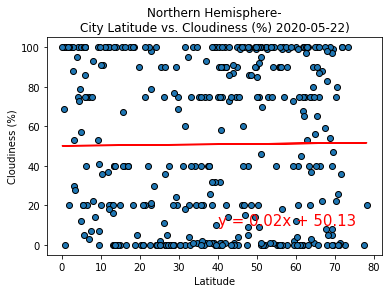

In [38]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',40,10)

In the Northern Hemisphere there does not seem to be a significant correlation between latitude and cloudiness. The linear regression has an r-squared value of only 0.07. Visually we can confirm that there is no correlation between the latitude and cloudiness in the Northern Hemisphere although, there are a lot of clouds.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1089353123798531
y = 0.34x + 59.42


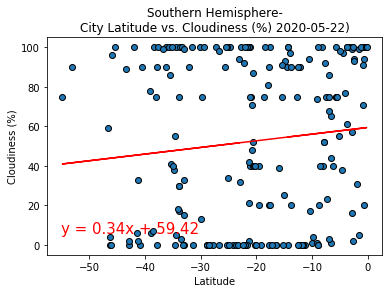

In [39]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-55,6)

In the Southern Hemisphere, latitude very weakly correlates with cloudiness with the linear regression yielding an r-squared value of 0.0003.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07609867807830738
y = 0.02x + 7.85


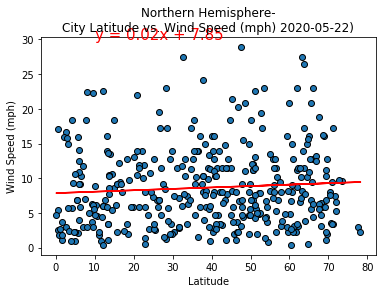

In [40]:
make_lin_reg_plot(north_weather["latitude"],north_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',10,30)

There is almost no correlation between latitude and wind speed in the Northern Hemisphere. The linear regression gives a weak r-squared value of 0.007. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0948662392964065
y = -0.04x + 8.01


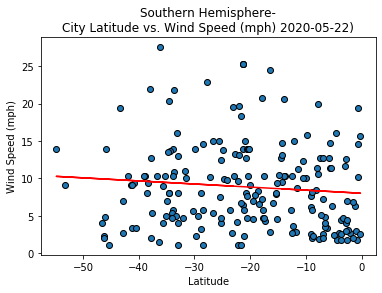

In [41]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-30,30)

In the Southern Hemisphere there is a weak correlation between latitude and wind speed with an r-squared value of -0.17.